In [92]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer 

In [93]:
df = pd.read_csv('C:/Users/fonse/Desktop/ICI 2023/MACHINE LEARNING/CSV/pokemon.csv')
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [94]:
print(df.dtypes)

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [95]:
nulos = df.isna().sum()

print(nulos)

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [96]:
#Revisamos altura
altura = df['height_m'].values
print(altura)

[ 0.7  1.   2.   0.6  1.1  1.7  0.5  1.   1.6  0.3  0.7  1.1  0.3  0.6
  1.   0.3  1.1  1.5  nan  nan  0.3  1.2  2.   3.5  0.4  nan  nan  nan
  0.4  0.8  1.3  0.5  0.9  1.4  0.6  1.3  nan  nan  0.5  1.   0.8  1.6
  0.5  0.8  1.2  0.3  1.   1.   1.5  nan  nan  nan  nan  0.8  1.7  0.5
  1.   0.7  1.9  0.6  1.   1.3  0.9  1.3  1.5  0.8  1.5  1.6  0.7  1.
  1.7  0.9  1.6  nan  nan  nan  1.   1.7  1.2  1.6  0.3  1.   0.8  1.4
  1.8  1.1  1.7  nan  nan  0.3  1.5  1.3  1.6  1.5  8.8  1.   1.6  0.4
  1.3  0.5  1.2  0.4  nan  0.4  nan  1.5  1.4  1.2  0.6  1.2  1.   1.9
  1.1  1.   2.2  0.4  1.2  0.6  1.3  0.8  1.1  1.3  1.5  1.4  1.1  1.3
  1.5  1.4  0.9  6.5  2.5  0.3  0.3  1.   0.8  0.9  0.8  0.4  1.   0.5
  1.3  1.8  2.1  1.7  1.6  2.   1.8  4.   2.2  2.   0.4  0.9  1.2  1.8
  0.5  0.9  1.7  0.6  1.1  2.3  0.8  1.8  0.7  1.6  1.   1.4  0.5  1.1
  1.8  0.5  1.2  0.3  0.3  0.3  0.3  0.6  0.2  1.5  0.6  0.8  1.4  0.4
  0.4  0.8  1.2  1.1  0.4  0.6  0.8  0.8  0.3  0.8  1.2  0.4  1.4  0.9
  1.   

In [97]:
#Rellenamos con promedio
promedio = df['height_m'].mean()
# Rellenar los valores NaN con el promedio
df['height_m'].fillna(promedio, inplace=True)

In [98]:
#Chequeamos cambios
altura = df['height_m'].values
print(altura)

[ 0.7         1.          2.          0.6         1.1         1.7
  0.5         1.          1.6         0.3         0.7         1.1
  0.3         0.6         1.          0.3         1.1         1.5
  1.16389245  1.16389245  0.3         1.2         2.          3.5
  0.4         1.16389245  1.16389245  1.16389245  0.4         0.8
  1.3         0.5         0.9         1.4         0.6         1.3
  1.16389245  1.16389245  0.5         1.          0.8         1.6
  0.5         0.8         1.2         0.3         1.          1.
  1.5         1.16389245  1.16389245  1.16389245  1.16389245  0.8
  1.7         0.5         1.          0.7         1.9         0.6
  1.          1.3         0.9         1.3         1.5         0.8
  1.5         1.6         0.7         1.          1.7         0.9
  1.6         1.16389245  1.16389245  1.16389245  1.          1.7
  1.2         1.6         0.3         1.          0.8         1.4
  1.8         1.1         1.7         1.16389245  1.16389245  0.3
  1.5      

In [99]:
#Asumimos que 0 indica 0% de hombre, pero no indica % femenino
male = df['percentage_male'].values
print(male)

[ 88.1  88.1  88.1  88.1  88.1  88.1  88.1  88.1  88.1  50.   50.   50.
  50.   50.   50.   50.   50.   50.   50.   50.   50.   50.   50.   50.
  50.   50.   50.   50.    0.    0.    0.  100.  100.  100.   24.6  24.6
  24.6  24.6  24.6  24.6  50.   50.   50.   50.   50.   50.   50.   50.
  50.   50.   50.   50.   50.   50.   50.   50.   50.   75.4  75.4  50.
  50.   50.   75.4  75.4  75.4  75.4  75.4  75.4  50.   50.   50.   50.
  50.   50.   50.   50.   50.   50.   50.   50.    nan   nan  50.   50.
  50.   50.   50.   50.   50.   50.   50.   50.   50.   50.   50.   50.
  50.   50.   50.    nan   nan  50.   50.   50.   50.  100.  100.   50.
  50.   50.   50.   50.    0.   50.    0.   50.   50.   50.   50.    nan
   nan  50.   50.    0.   75.4  75.4  50.  100.   50.   50.   50.    nan
  88.1  88.1  88.1  88.1   nan  88.1  88.1  88.1  88.1  88.1  88.1   nan
   nan   nan  50.   50.   50.    nan   nan  88.1  88.1  88.1  88.1  88.1
  88.1  88.1  88.1  88.1  50.   50.   50.   50.   50.   50.

In [100]:
df['percentage_male'].fillna(0.5, inplace=True)
male = df['percentage_male'].values
print(male)

[ 88.1  88.1  88.1  88.1  88.1  88.1  88.1  88.1  88.1  50.   50.   50.
  50.   50.   50.   50.   50.   50.   50.   50.   50.   50.   50.   50.
  50.   50.   50.   50.    0.    0.    0.  100.  100.  100.   24.6  24.6
  24.6  24.6  24.6  24.6  50.   50.   50.   50.   50.   50.   50.   50.
  50.   50.   50.   50.   50.   50.   50.   50.   50.   75.4  75.4  50.
  50.   50.   75.4  75.4  75.4  75.4  75.4  75.4  50.   50.   50.   50.
  50.   50.   50.   50.   50.   50.   50.   50.    0.5   0.5  50.   50.
  50.   50.   50.   50.   50.   50.   50.   50.   50.   50.   50.   50.
  50.   50.   50.    0.5   0.5  50.   50.   50.   50.  100.  100.   50.
  50.   50.   50.   50.    0.   50.    0.   50.   50.   50.   50.    0.5
   0.5  50.   50.    0.   75.4  75.4  50.  100.   50.   50.   50.    0.5
  88.1  88.1  88.1  88.1   0.5  88.1  88.1  88.1  88.1  88.1  88.1   0.5
   0.5   0.5  50.   50.   50.    0.5   0.5  88.1  88.1  88.1  88.1  88.1
  88.1  88.1  88.1  88.1  50.   50.   50.   50.   50.   50.

In [101]:
#Revisamos capture_ratecommand:workbench.action.openLargeOutput?d7d02da6-4f62-4e37-8162-3cfd4c5aeab7
valores_capture_rate = df['capture_rate'].values
print(valores_capture_rate)

['45' '45' '45' '45' '45' '45' '45' '45' '45' '255' '120' '45' '255' '120'
 '45' '255' '120' '45' '255' '127' '255' '90' '255' '90' '190' '75' '255'
 '90' '235' '120' '45' '235' '120' '45' '150' '25' '190' '75' '170' '50'
 '255' '90' '255' '120' '45' '190' '75' '190' '75' '255' '50' '255' '90'
 '190' '75' '190' '75' '190' '75' '255' '120' '45' '200' '100' '50' '180'
 '90' '45' '255' '120' '45' '190' '60' '255' '120' '45' '190' '60' '190'
 '75' '190' '60' '45' '190' '45' '190' '75' '190' '75' '190' '60' '190'
 '90' '45' '45' '190' '75' '225' '60' '190' '60' '90' '45' '190' '75' '45'
 '45' '45' '190' '60' '120' '60' '30' '45' '45' '225' '75' '225' '60'
 '225' '60' '45' '45' '45' '45' '45' '45' '45' '255' '45' '45' '35' '45'
 '45' '45' '45' '45' '45' '45' '45' '45' '45' '25' '3' '3' '3' '45' '45'
 '45' '3' '45' '45' '45' '45' '45' '45' '45' '45' '45' '45' '255' '90'
 '255' '90' '255' '90' '255' '90' '90' '190' '75' '190' '150' '170' '190'
 '75' '190' '75' '235' '120' '45' '45' '190' '75' 

In [102]:
df['capture_rate'] = df['capture_rate'].str.extract(r'(\d+)')
valores_capture_rate = df['capture_rate'].values
print(valores_capture_rate)

['45' '45' '45' '45' '45' '45' '45' '45' '45' '255' '120' '45' '255' '120'
 '45' '255' '120' '45' '255' '127' '255' '90' '255' '90' '190' '75' '255'
 '90' '235' '120' '45' '235' '120' '45' '150' '25' '190' '75' '170' '50'
 '255' '90' '255' '120' '45' '190' '75' '190' '75' '255' '50' '255' '90'
 '190' '75' '190' '75' '190' '75' '255' '120' '45' '200' '100' '50' '180'
 '90' '45' '255' '120' '45' '190' '60' '255' '120' '45' '190' '60' '190'
 '75' '190' '60' '45' '190' '45' '190' '75' '190' '75' '190' '60' '190'
 '90' '45' '45' '190' '75' '225' '60' '190' '60' '90' '45' '190' '75' '45'
 '45' '45' '190' '60' '120' '60' '30' '45' '45' '225' '75' '225' '60'
 '225' '60' '45' '45' '45' '45' '45' '45' '45' '255' '45' '45' '35' '45'
 '45' '45' '45' '45' '45' '45' '45' '45' '45' '25' '3' '3' '3' '45' '45'
 '45' '3' '45' '45' '45' '45' '45' '45' '45' '45' '45' '45' '255' '90'
 '255' '90' '255' '90' '255' '90' '90' '190' '75' '190' '150' '170' '190'
 '75' '190' '75' '235' '120' '45' '45' '190' '75' 

In [103]:
print(df)

                       abilities  against_bug  against_dark  against_dragon  \
0    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
1    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
2    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
3       ['Blaze', 'Solar Power']         0.50           1.0             1.0   
4       ['Blaze', 'Solar Power']         0.50           1.0             1.0   
..                           ...          ...           ...             ...   
796              ['Beast Boost']         0.25           1.0             0.5   
797              ['Beast Boost']         1.00           1.0             0.5   
798              ['Beast Boost']         2.00           0.5             2.0   
799              ['Prism Armor']         2.00           2.0             1.0   
800               ['Soul-Heart']         0.25           0.5             0.0   

     against_electric  against_fairy  against_fight

In [104]:
nulos = df.isna().sum()

print(nulos)

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m               0
hp                     0
japanese_name          0
name                   0
percentage_male        0
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [105]:
#Revisamos peso
peso = df['weight_kg'].values
print(peso)

[6.900e+00 1.300e+01 1.000e+02 8.500e+00 1.900e+01 9.050e+01 9.000e+00
 2.250e+01 8.550e+01 2.900e+00 9.900e+00 3.200e+01 3.200e+00 1.000e+01
 2.950e+01 1.800e+00 3.000e+01 3.950e+01       nan       nan 2.000e+00
 3.800e+01 6.900e+00 6.500e+01 6.000e+00       nan       nan       nan
 7.000e+00 2.000e+01 6.000e+01 9.000e+00 1.950e+01 6.200e+01 7.500e+00
 4.000e+01       nan       nan 5.500e+00 1.200e+01 7.500e+00 5.500e+01
 5.400e+00 8.600e+00 1.860e+01 5.400e+00 2.950e+01 3.000e+01 1.250e+01
       nan       nan       nan       nan 1.960e+01 7.660e+01 2.800e+01
 3.200e+01 1.900e+01 1.550e+02 1.240e+01 2.000e+01 5.400e+01 1.950e+01
 5.650e+01 4.800e+01 1.950e+01 7.050e+01 1.300e+02 4.000e+00 6.400e+00
 1.550e+01 4.550e+01 5.500e+01       nan       nan       nan 3.000e+01
 9.500e+01 3.600e+01 7.850e+01 6.000e+00 6.000e+01 1.500e+01 3.920e+01
 8.520e+01 9.000e+01 1.200e+02       nan       nan 4.000e+00 1.325e+02
 1.000e-01 1.000e-01 4.050e+01 2.100e+02 3.240e+01 7.560e+01 6.500e+00
 6.000

In [106]:
#Rellenamos con promedio
promediokg = df['weight_kg'].mean()
# Rellenar los valores NaN con el promedio
df['weight_kg'].fillna(promediokg, inplace=True)

In [107]:
peso = df['weight_kg'].values
print(peso)

[6.9000000e+00 1.3000000e+01 1.0000000e+02 8.5000000e+00 1.9000000e+01
 9.0500000e+01 9.0000000e+00 2.2500000e+01 8.5500000e+01 2.9000000e+00
 9.9000000e+00 3.2000000e+01 3.2000000e+00 1.0000000e+01 2.9500000e+01
 1.8000000e+00 3.0000000e+01 3.9500000e+01 6.1378105e+01 6.1378105e+01
 2.0000000e+00 3.8000000e+01 6.9000000e+00 6.5000000e+01 6.0000000e+00
 6.1378105e+01 6.1378105e+01 6.1378105e+01 7.0000000e+00 2.0000000e+01
 6.0000000e+01 9.0000000e+00 1.9500000e+01 6.2000000e+01 7.5000000e+00
 4.0000000e+01 6.1378105e+01 6.1378105e+01 5.5000000e+00 1.2000000e+01
 7.5000000e+00 5.5000000e+01 5.4000000e+00 8.6000000e+00 1.8600000e+01
 5.4000000e+00 2.9500000e+01 3.0000000e+01 1.2500000e+01 6.1378105e+01
 6.1378105e+01 6.1378105e+01 6.1378105e+01 1.9600000e+01 7.6600000e+01
 2.8000000e+01 3.2000000e+01 1.9000000e+01 1.5500000e+02 1.2400000e+01
 2.0000000e+01 5.4000000e+01 1.9500000e+01 5.6500000e+01 4.8000000e+01
 1.9500000e+01 7.0500000e+01 1.3000000e+02 4.0000000e+00 6.4000000e+00
 1.550

In [108]:
print(df)
nulos = df.isna().sum()
print(nulos)

                       abilities  against_bug  against_dark  against_dragon  \
0    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
1    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
2    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
3       ['Blaze', 'Solar Power']         0.50           1.0             1.0   
4       ['Blaze', 'Solar Power']         0.50           1.0             1.0   
..                           ...          ...           ...             ...   
796              ['Beast Boost']         0.25           1.0             0.5   
797              ['Beast Boost']         1.00           1.0             0.5   
798              ['Beast Boost']         2.00           0.5             2.0   
799              ['Prism Armor']         2.00           2.0             1.0   
800               ['Soul-Heart']         0.25           0.5             0.0   

     against_electric  against_fairy  against_fight

In [109]:
# Eliminaremos : abilities  , class, japan name, name , pokedex number, type1, type2, gen, legendary.

In [110]:
print(df.dtypes)

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [111]:
eliminar = ['abilities', 'classfication', 'japanese_name', 'name', 'pokedex_number', 'type1', 'type2', 'generation', 'is_legendary']

df.drop(columns=eliminar, inplace=True)


In [112]:
#DATA SET LIMPIO
print(df)

     against_bug  against_dark  against_dragon  against_electric  \
0           1.00           1.0             1.0               0.5   
1           1.00           1.0             1.0               0.5   
2           1.00           1.0             1.0               0.5   
3           0.50           1.0             1.0               1.0   
4           0.50           1.0             1.0               1.0   
..           ...           ...             ...               ...   
796         0.25           1.0             0.5               2.0   
797         1.00           1.0             0.5               0.5   
798         2.00           0.5             2.0               0.5   
799         2.00           2.0             1.0               1.0   
800         0.25           0.5             0.0               1.0   

     against_fairy  against_fight  against_fire  against_flying  \
0              0.5            0.5           2.0             2.0   
1              0.5            0.5           2.0  

In [113]:
nulos = df.isna().sum()
print(nulos)

against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
defense              0
experience_growth    0
height_m             0
hp                   0
percentage_male      0
sp_attack            0
sp_defense           0
speed                0
weight_kg            0
dtype: int64


In [114]:
print(df.dtypes)

against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
percentage_male      float64
sp_attack              int64
sp_defense             int64
speed                  int64
weight_kg            float64
dtype: object


In [120]:
df['capture_rate'] = df['capture_rate'].astype(float)
print(df.dtypes)

against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate         float64
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
percentage_male      float64
sp_attack              int64
sp_defense             int64
speed                  int64
weight_kg            float64
dtype: object


In [121]:
#Es necesario normalizar los datos, ya que pca trabaja mejor con datos centrados y escalados.
df_std = StandardScaler().fit_transform(df) 
df_std= pd.DataFrame(df_std, columns=df.columns)

In [122]:
corr = df_std.corr()
corr

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,capture_rate,defense,experience_growth,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg
against_bug,1.000000,0.230107,0.165430,-0.246943,0.239566,0.137902,0.202778,0.183343,0.129174,0.079197,...,0.005230,-0.036474,0.035717,-0.059781,0.034897,-0.046366,0.055352,-0.002342,-0.043802,-0.031344
against_dark,0.230107,1.000000,0.140830,-0.015830,-0.301354,-0.357981,0.010527,-0.179697,0.672337,-0.006533,...,-0.047674,0.048039,-0.008391,0.018608,0.010589,-0.203525,0.170849,0.132507,-0.000326,0.037634
against_dragon,0.165430,0.140830,1.000000,-0.108928,0.439705,0.035237,-0.261570,0.064850,-0.049941,-0.037135,...,-0.091317,-0.023794,0.172547,0.164448,0.089721,0.084189,0.039739,-0.047416,0.078123,0.125991
against_electric,-0.246943,-0.015830,-0.108928,1.000000,-0.089864,-0.102798,-0.279029,-0.111461,-0.073031,0.056209,...,-0.006815,-0.072433,-0.041584,0.003022,-0.035354,0.067669,0.022305,0.019193,0.111422,-0.101403
against_fairy,0.239566,-0.301354,0.439705,-0.089864,1.000000,0.157712,-0.169489,0.199862,-0.120806,0.052899,...,-0.091230,0.001655,0.146370,0.114993,0.129284,0.020980,-0.010296,0.002754,0.065401,0.098210
against_fight,0.137902,-0.357981,0.035237,-0.102798,0.157712,1.000000,-0.076480,-0.318941,-0.546982,0.269157,...,-0.040466,0.150424,0.010407,0.058524,0.109425,0.045703,-0.118481,-0.044460,-0.050495,0.159761
against_fire,0.202778,0.010527,-0.261570,-0.279029,-0.169489,-0.076480,1.000000,0.528127,0.050570,-0.463634,...,0.078668,0.037921,-0.027136,-0.085422,-0.099242,-0.104147,-0.088578,-0.019520,-0.079129,-0.043925
against_flying,0.183343,-0.179697,0.064850,-0.111461,0.199862,-0.318941,0.528127,1.000000,0.013204,-0.358467,...,0.076299,-0.127950,0.019100,-0.072533,-0.060624,0.104673,-0.111243,-0.079022,-0.043381,-0.125959
against_ghost,0.129174,0.672337,-0.049941,-0.073031,-0.120806,-0.546982,0.050570,0.013204,1.000000,0.029542,...,-0.112219,0.136490,0.059262,0.031626,-0.062052,-0.098067,0.233309,0.195439,-0.029007,0.046506
against_grass,0.079197,-0.006533,-0.037135,0.056209,0.052899,0.269157,-0.463634,-0.358467,0.029542,1.000000,...,0.000511,0.139542,-0.039623,0.029533,0.056886,0.074192,-0.093899,-0.056427,-0.153618,0.048407


In [123]:
#Calculamos valores y vectores propios de la matriz de correlacion
values, vectors = np.linalg.eig(corr)


In [124]:
#Juntamos en pares y ordenamos de manera descendente segun valor propio
pares = [(np.abs(values[i]), vectors[:, i]) for i in range(len(values))]
pares.sort(key=lambda x: x[0], reverse=True)
pares

[(5.813690426860478,
  array([ 0.00265953, -0.06699729, -0.06613644,  0.03068595, -0.05841805,
         -0.04912696,  0.05808583,  0.10047007, -0.07691401, -0.02597291,
         -0.07131085,  0.00106373,  0.09571556,  0.10635396,  0.07865012,
          0.0515534 ,  0.00552633, -0.04491305, -0.28119859, -0.27560844,
          0.19295099, -0.381055  ,  0.29438007, -0.26219957, -0.15603517,
         -0.27466256, -0.25685271,  0.13354496, -0.27541766, -0.26899771,
         -0.17500684, -0.26933921])),
 (3.5735353855250898,
  array([ 0.16363966, -0.07200368,  0.11849533,  0.01155882,  0.18543621,
         -0.19445563,  0.21539463,  0.37366295, -0.04162893, -0.27667015,
         -0.39432875,  0.28177143,  0.26334873,  0.3461914 ,  0.04989325,
          0.171168  ,  0.00871535, -0.29515447,  0.04606399,  0.07641214,
         -0.05030523,  0.07723099, -0.05945763, -0.08659733,  0.08668834,
          0.04769966,  0.07455685, -0.0197904 ,  0.09380349,  0.04802009,
          0.13945253, -0.022603

In [125]:
#Calculamos la varianza exlicada por cada componente, y la acumulada.
var_total = sum(values)
var_expl = [value / var_total for value in values]
var_cum = np.cumsum(var_expl)

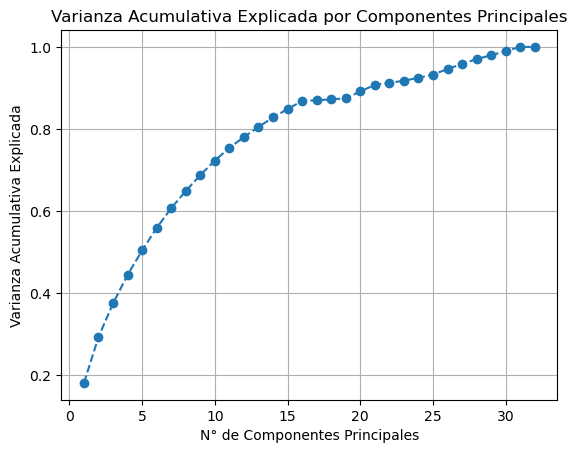

In [127]:
#Graficamos la varianza explicada segun componentes principales
plt.plot(range(1, len(var_cum) + 1), var_cum, marker='o', linestyle='--')
plt.grid()
plt.xlabel('N° de Componentes Principales')
plt.ylabel('Varianza Acumulativa Explicada')
plt.title('Varianza Acumulativa Explicada por Componentes Principales')
plt.show()